# Finding Heavy Traffic Indicators on I-94

### Introduction
The goal of this project was to determine which factors contribute to heavy traffic. Our data looked at westbound data on I-94 between Minneapolis and St. Paul, MN, hourly between 2012 and 2018.

### Conclusion
The best predictor of heavy traffic is time of day and year: Traffic is more likely to be heavy during rush hour on business days during spring, summer, and fall. Weather does not do a good job of predicting traffic volume.


### Data

To perform this analysis, we used hourly traffic data for westbound I-94 in Minneapolis-St Paul, MN between 2012 and 2018. This data is collected from a station between Minneapolis and St. Paul. The data (made available by John Hogue) can be downloaded [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The following data is included in the data set:

|Name|Definition|
|:----|:----|
|holiday|Indicates a US National holiday or the Minnesota State Fair|
|temp|Average temperature in Kelvin|
|rain_1h|Millimeters of rain that occurred in the hour|
|snow_1h|Millimeters of snow that occurred in the hour|
|clouds_all|Percentage of cloud cover|
|weather_main|Short textual description of the current weather|
|weather_descriptio|Long textual description of the current weather|
|date_time|Hour of the data collected in local CST time|
|traffic_volume|Hourly I-94 ATR 301 reported westbound traffic volume|

In [8]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# comment out when exploring; comment in when presenting
import warnings
warnings.filterwarnings('ignore')


In [2]:
# read in and explore data

traffic_df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic_df.head(5))
print(traffic_df.head(5))
print(traffic_df.info())


  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clo

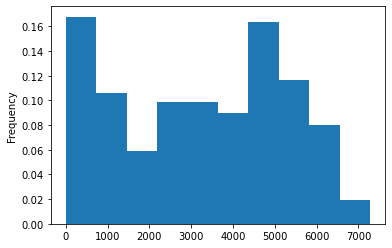

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [9]:
# explore the traffic volume

# histogram of traffic volume - y-axis is % of hours with each bucket of traffic volume
traffic_df['traffic_volume'].plot.hist(weights=np.ones(len(traffic_df)) / len(traffic_df))
plt.show()

# describe
print(traffic_df['traffic_volume'].describe())

### Notes on traffic volume:
* Range of 0-7280
* Usually low or medium-high: 0-500 or 4500-5000
    * This might be due to daytime/nighttime hours

## +++ Time Indicators +++
Traffic is busiest during the day on business days during rush hour during spring, summer, and fall

In [35]:
# split into day (7AM - 7PM) and night (7PM-7AM)

traffic_df['date_time'] = pd.to_datetime(traffic_df['date_time'])
traffic_df['hour'] = traffic_df['date_time'].dt.hour

day_df = traffic_df[(traffic_df['hour'] >= 7) & (traffic_df['hour'] < 19)]
night_df = traffic_df[(traffic_df['hour'] >= 19) | (traffic_df['hour'] < 7)]

print(len(day_df))
print(len(night_df))


23877
24327


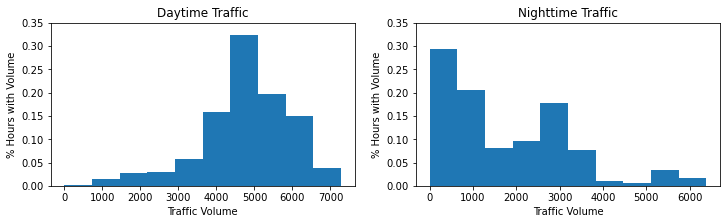

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [36]:
# explore the day and night traffic volume

# histograms of day and night traffic
plt.figure(figsize=(12,3))

for i, tm_of_day, df in zip(range(1, 3), ['Day', 'Night'], [day_df, night_df]):
    plt.subplot(1, 2, i)
    df['traffic_volume'].plot.hist(weights=np.ones(len(df)) / len(df))
    plt.title('{t}time Traffic'.format(t=tm_of_day))
    plt.xlabel('Traffic Volume')
    plt.ylabel('% Hours with Volume')
    plt.ylim(0, 0.35)

plt.show()

# describe
print(day_df['traffic_volume'].describe())
print(night_df['traffic_volume'].describe())


### Notes on daytime/nighttime traffic volumes:
* Most of the time during the day, traffic is high
* Most of the time at night, traffic is low
    * Since we're only focusing on heavy traffic, we'll exclude nighttime hours from our data

<ipython-input-40-2e2216aa0525>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['month'] = day_df['date_time'].dt.month


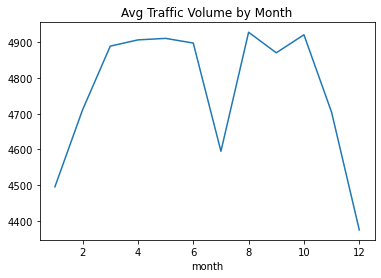

<ipython-input-40-2e2216aa0525>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['dayofweek'] = day_df['date_time'].dt.dayofweek   # 0 = monday


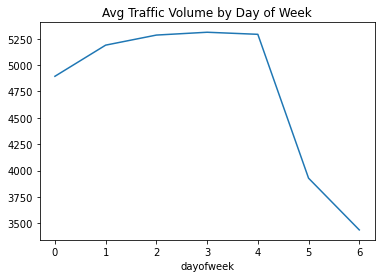

In [40]:
# get average traffic volume by month and day of week

# avg by month
day_df['month'] = day_df['date_time'].dt.month
avg_by_month_gb = day_df.groupby('month').mean()

avg_by_month_gb['traffic_volume'].plot()
plt.title('Avg Traffic Volume by Month')
plt.show()

# avg by day of week
day_df['dayofweek'] = day_df['date_time'].dt.dayofweek   # 0 = monday
avg_by_wd_gb = day_df.groupby('dayofweek').mean()

avg_by_wd_gb['traffic_volume'].plot()
plt.title('Avg Traffic Volume by Day of Week')
plt.show()


### Notes on traffic volumes by month and day of week
* Month: Traffic volume is lower in the winter and in July
* Day of Week: Traffic volume is lower on weekends

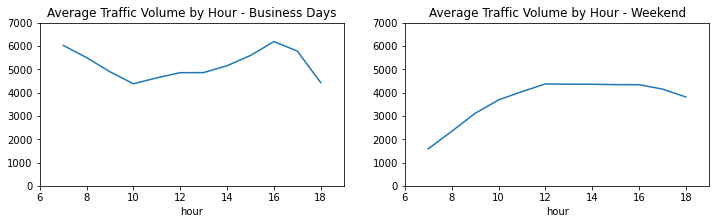

In [49]:
# get average traffic volume by hour

# split into business days vs weekend
   # note - dq uses a copy of the dfs here - why? best practices?
biz_days_df = day_df[day_df['dayofweek'] <= 4]   # 4 = friday
biz_days_avg_by_hr_gb = biz_days_df.groupby('hour').mean()

weekend_df = day_df[day_df['dayofweek'] >= 5]    # 5 = saturday
weekend_avg_by_hr_gb = weekend_df.groupby('hour').mean()

# plot line charts
plt.figure(figsize=(12,3))

for i, wd, df in zip(range(1, 3), ['Business Days', 'Weekend'], [biz_days_avg_by_hr_gb, weekend_avg_by_hr_gb]):
    plt.subplot(1, 2, i)
    df['traffic_volume'].plot()
    plt.title('Average Traffic Volume by Hour - {w}'.format(w=wd))
    plt.xlim(6, 19)
    plt.ylim(0, 7000)

plt.show()


### Notes on traffic volumes by hour
* On business days, traffic is higher on average during rush hours: 7AM-8AM and 3PM-5PM
* On weekends, traffic is consistent between late morning and evening.
* Traffic on business days is heavier than traffic on weekends.

## +++ Weather Indicators +++
The recorded weather variables can't predict the traffic volume.

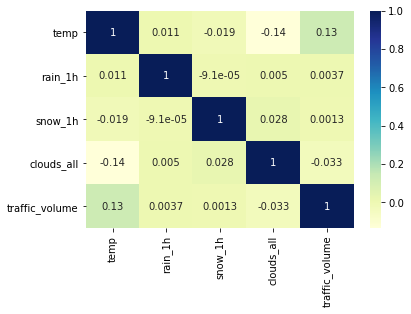

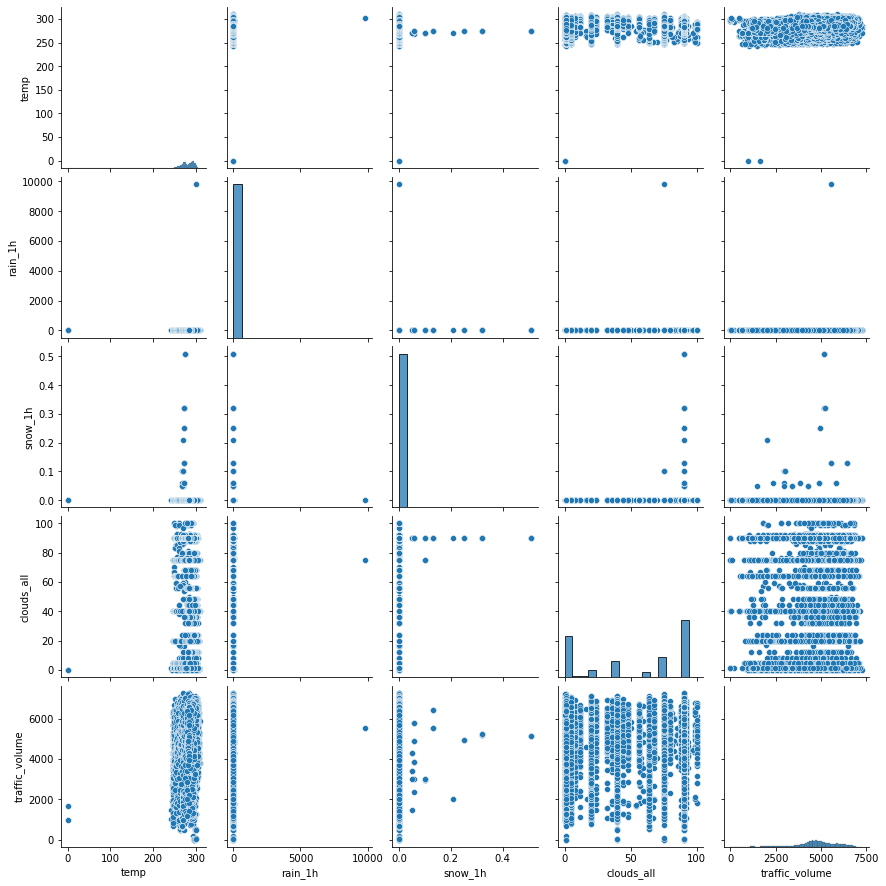

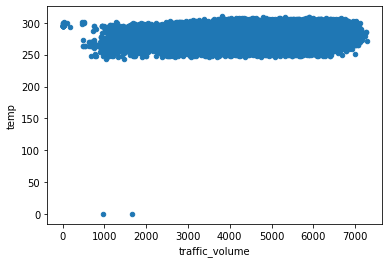

In [78]:
# get correlations and graph

sns.heatmap(day_df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr(), annot = True, cmap="YlGnBu")
plt.show()

sns.pairplot(day_df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']])
plt.show()

day_df.plot.scatter('traffic_volume', 'temp')
plt.show()


### Notes on numeric weather indicators:
* None of these seem to do a great job predicting traffic volume

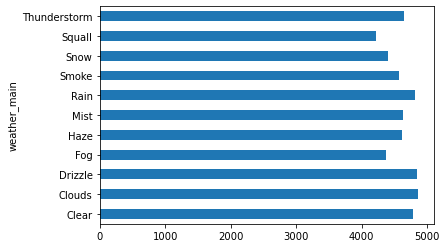

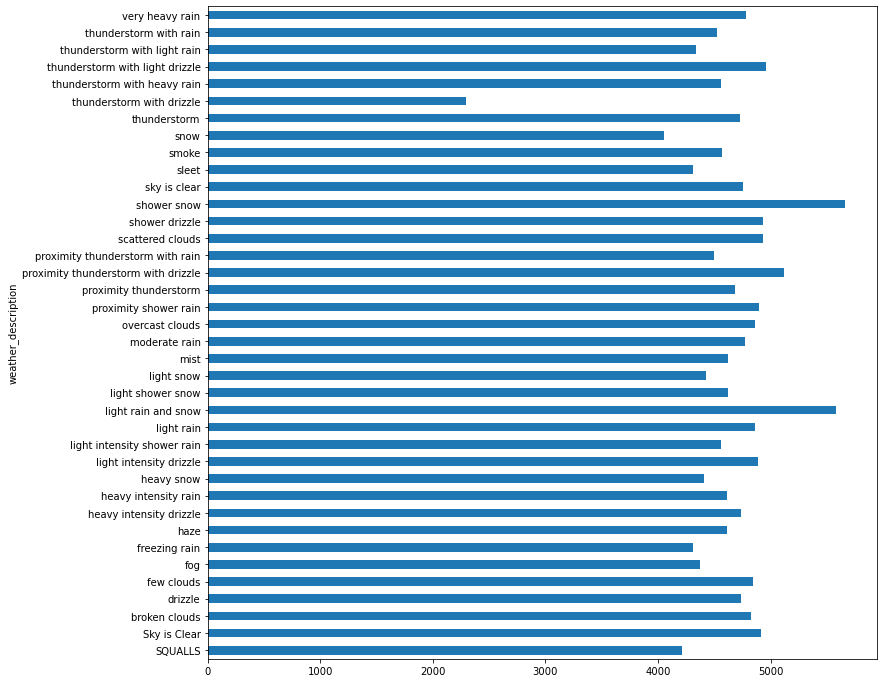

In [84]:
# get the avg traffic for each weather category

avg_by_weather_df = day_df.groupby('weather_main').mean().reset_index()
avg_by_weather_df.plot.barh('weather_main', 'traffic_volume', legend=False)
plt.show()

avg_by_weather_long_df = day_df.groupby('weather_description').mean().reset_index()
avg_by_weather_long_df.plot.barh('weather_description', 'traffic_volume', legend=False, figsize=(12, 12))
plt.show()

### Notes on catgeorical weather indicators:
* None of these seem to do a great job predicting traffic volume